In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact


In [3]:
df = pd.read_csv('bank_customer_churn.csv')

df = df.dropna()
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [18]:


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)



,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred_rf = rf.predict(X_test)
y_pred_lr = log_reg.predict(X_test)

y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

churn_rate = y_test.mean()
total_customers = len(y_test)
high_risk = sum(y_prob_rf > 0.7)

print("---- KPIs ----")
print(f"Total Customers: {total_customers}")
print(f"Churn Rate: {churn_rate:.2%}")
print(f"High Risk Customers: {high_risk}")
print(f"Random Forest AUC: {auc(*roc_curve(y_test, y_prob_rf)[:2]):.2f}")

---- KPIs ----
Total Customers: 2000
Churn Rate: 20.35%
High Risk Customers: 125
Random Forest AUC: 0.85


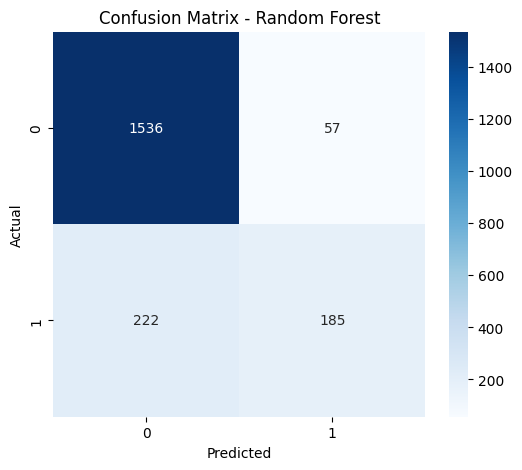

In [20]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

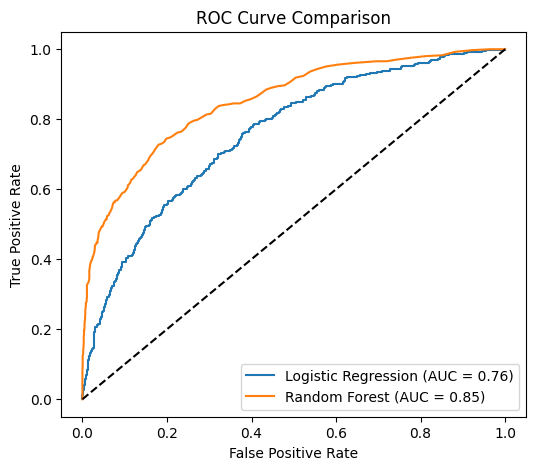

In [21]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

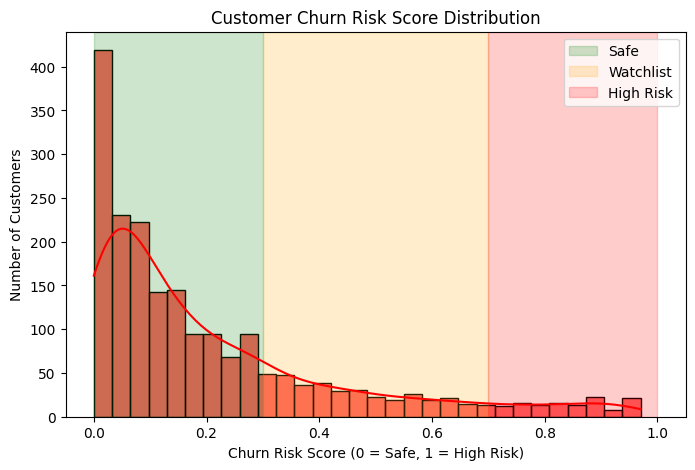

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(y_prob_rf, bins=30, kde=True, color="red", alpha=0.6)

plt.axvspan(0, 0.3, color="green", alpha=0.2, label="Safe")
plt.axvspan(0.3, 0.7, color="orange", alpha=0.2, label="Watchlist")
plt.axvspan(0.7, 1.0, color="red", alpha=0.2, label="High Risk")

plt.title("Customer Churn Risk Score Distribution")
plt.xlabel("Churn Risk Score (0 = Safe, 1 = High Risk)")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

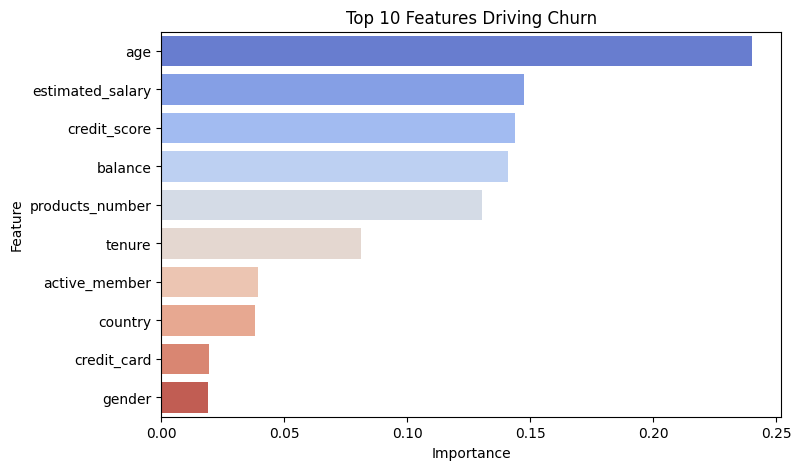

In [23]:
importances = rf.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="coolwarm")
plt.title("Top 10 Features Driving Churn")
plt.show()
